## Zomato Data Set Analysis and Visualization

## Importing Libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
plt.style.use('dark_background')


In [119]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [23]:
df.shape

(51717, 11)

In [21]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [22]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [25]:
df.drop_duplicates(inplace = True)
df.shape

(51609, 11)

In [27]:
df['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [28]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [29]:
df['rate'].isnull().sum()

10019

In [30]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [32]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [33]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [34]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [35]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [36]:
df = df.drop(['listed_in(city)'], axis = 1)

In [37]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [38]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [39]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)

In [40]:
df['Cost2plates'].unique()
        

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [41]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [42]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Cafe, Food Court                  2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [43]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Cafe, Food Court                2
Dessert Parlor, Food Court      2
Dessert Parlor, Kiosk           2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 85, dtype: int64

In [44]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [175]:
location = df['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]



def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5124
others                   4707
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              906
Kalyan Nagar              853
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Banaswadi                 664
Brookefield               658
New BEL Road              649
Kammanahalli              648
Rajajinagar               591
Church Street             569
Lavelle Ro

In [46]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [47]:
cuisines = df['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
South Indian, Fast Food                  104
North Indian, Mughlai, Chinese           104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [57]:
df.head() 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [58]:
df.to_csv(r'C:\Users\pedne\OneDrive\Desktop\Zomato\ZomatoUpdate.csv' , index=False)

C:\Users\pedne\anconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

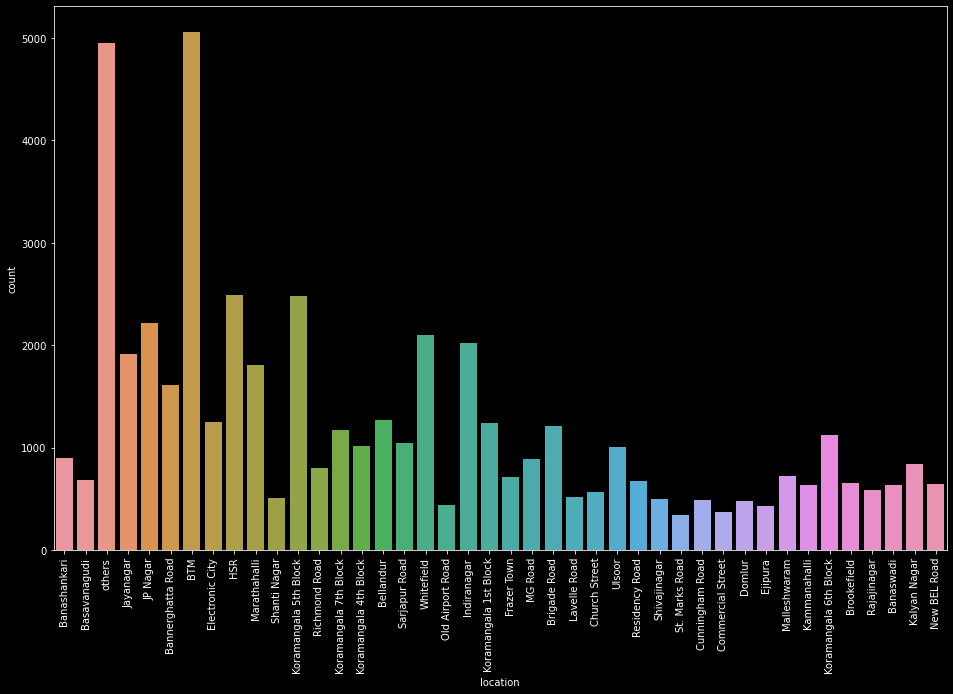

In [48]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['location'])
plt.xticks(rotation=90)

C:\Users\pedne\anconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

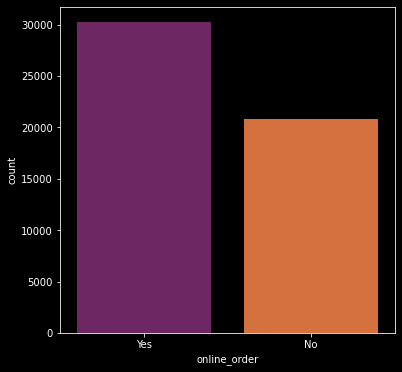

In [49]:
plt.figure(figsize = (6,6))
sns.countplot(df['online_order'], palette = 'inferno')

C:\Users\pedne\anconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

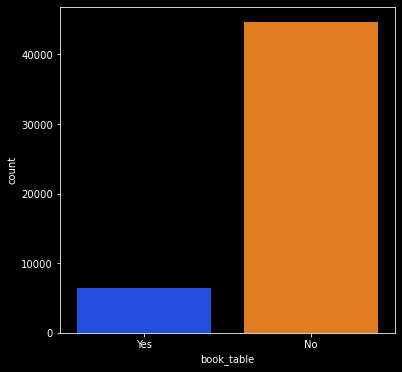

In [56]:
plt.figure(figsize = (6,6))
sns.countplot(df['book_table'], palette = 'bright')

<AxesSubplot:xlabel='online_order', ylabel='rate'>

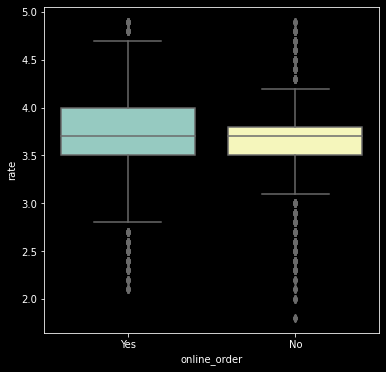

In [51]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

<AxesSubplot:xlabel='book_table', ylabel='rate'>

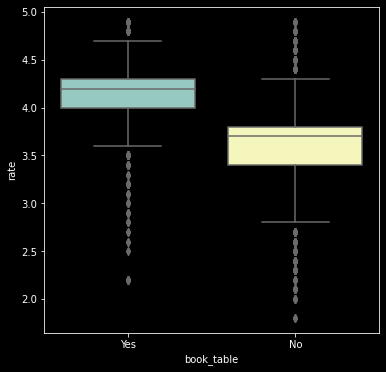

In [52]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

In [53]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<AxesSubplot:xlabel='location'>

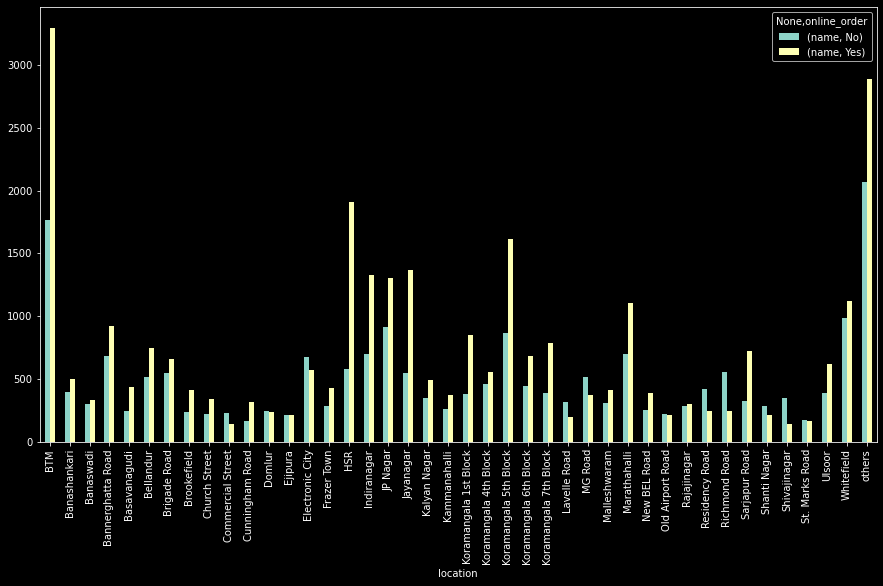

In [54]:
df1.plot(kind = 'bar', figsize = (15,8))

In [176]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_book_table.csv')
df2 = pd.read_csv('location_book_table.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    4956  168
Banashankari            842   64
Banaswadi               656    8
Bannerghatta Road      1531   99
Basavanagudi            668   16
Bellandur              1188   98
Brigade Road           1039  179
Brookefield             584   74
Church Street           387  182
Commercial Street       370    0
Cunningham Road         316  175
Domlur                  441   55
Ejipura                 439    0
Electronic City        1159   99
Frazer Town             719    8
HSR                    2306  217
Indiranagar            1629  454
JP Nagar               1920  315
Jayanagar              1647  279
Kalyan Nagar            704  149
Kammanahalli            599   49
Koramangala 1st Block  1188   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1812  692
Koramangala 6th Block  1043  113
Koramangala 7th Block  1017  164
Koramangala 8th Block   303   17
Lavelle Road            297  232
MG Road                 571  347
Malleshwaram            636   89
Marathahalli           1680  166
New BEL Road            593   56
Old Airport Road        387   59
Rajajinagar             550   41
Residency Road          524  151
Richmond Road           696  116
Sarjapur Road           909  156
Shanti Nagar            453   58
Shivajinagar            476   23
St. Marks Road          228  124
Ulsoor                  846  177
Whitefield             1891  253
others                 4352  355

<AxesSubplot:xlabel='location'>

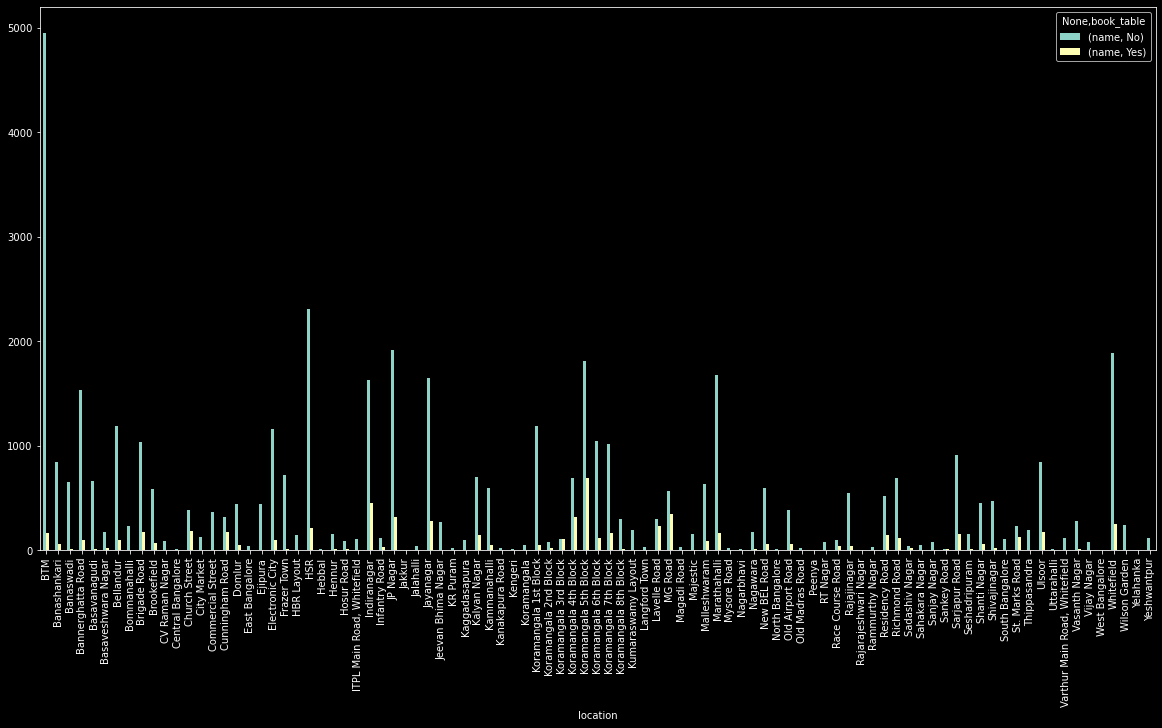

In [174]:
df2.plot(kind = 'bar', figsize = (20,10))

In [64]:
# Adjust the column names
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)
df.Cost2plates.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [65]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'Cost2plates', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

zomato_en = Encode(df.copy())

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

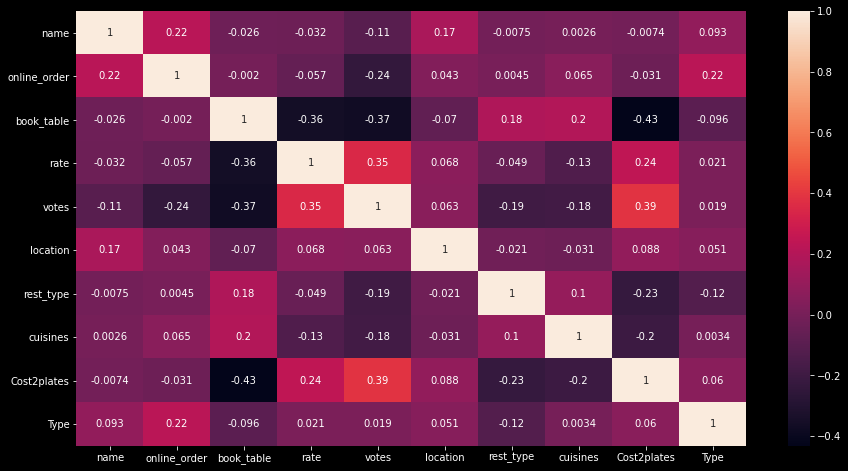

In [66]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  bool   
 2   book_table    51042 non-null  bool   
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   Cost2plates   51042 non-null  float64
 9   Type          51042 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 5.6+ MB


In [102]:
#Check the shape of splited data

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((35729, 7), (15313, 7), (35729,), (15313,))

In [103]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [105]:
#Train the model on train set

lr.fit(X_train,y_train)

LinearRegression()

In [106]:
#Check the model socre on train and test set 
print(lr.score (X_train,y_train))

print(lr.score (X_test,y_test))

1.0
1.0


In [108]:
#New Predict

lr_pred=lr.predict(X_test)

In [112]:
from sklearn.metrics import r2_score

lr_score=r2_score (y_test,lr_pred)*100 
print("Accuracy score for LR :",lr_score)

Accuracy score for LR : 100.0


In [123]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
rfra=RandomForestRegressor()
rfra

RandomForestRegressor()

In [124]:
rfra.fit(X_train, y_train)

RandomForestRegressor()

In [126]:
print(rfra.score (X_train,y_train)) 
print(rfra.score(X_test,y_test))

0.9999998418891214
0.9999997087782032


In [128]:
rfr_pred=rfra.predict(X_test)

In [140]:
from sklearn.metrics import r2_score
rfra_score=r2_score (y_test,rfr_pred)*100 
print("Accuracy score for RFR :",rfra_score)

Accuracy score for RFR : 99.99997087782032


In [131]:
from sklearn.svm import SVR

In [135]:
svr=SVR()

In [136]:
svr.fit(X_train,y_train)

SVR()

In [137]:
print(svr.score (X_train,y_train)) 
print(svr.score (X_test,y_test))

0.202412988973092
0.20860498531068028


In [138]:
svr_pred=svr.predict(X_test)

In [141]:
from sklearn.metrics import r2_score

svr_score=r2_score (y_test, svr_pred)*100
print("Accuracy score for SVR:", svr_score)

Accuracy score for SVR: 20.86049853106803


In [143]:
pd.DataFrame({"Model Names":['Linear Reg', 'RandomForest Reg', 'SupportVector Reg'], 
              "Accuracy score":[lr_score, rfra_score, svr_score]})

,Model Names,Accuracy score
0,Linear Reg,100.000000
1,RandomForest Reg,99.999971
2,SupportVector Reg,20.860499


In [167]:
#Compare Actual rating with Linear Regression new Predicted Rating

sample=pd.DataFrame({"Actual Rating":y_test,
                     "Predicted Rating":np.round(lr_pred,2)})
sample.head(10)


,Actual Rating,Predicted Rating
25417,4.100000,4.1
1526,3.300000,3.3
49959,3.400000,3.4
50093,4.100000,4.1
7283,3.700142,3.7
50446,3.700142,3.7
42426,3.500000,3.5
18564,3.500000,3.5
35233,3.300000,3.3
9863,3.600000,3.6


In [155]:
sample=pd.DataFrame({"Actual Rating":y_test, 
                       "Predicted Rating": np.round(rfr_pred,3)})
sample

,Actual Rating,Predicted Rating
25417,4.100000,4.1
1526,3.300000,3.3
49959,3.400000,3.4
50093,4.100000,4.1
7283,3.700142,3.7
...,...,...
38496,3.500000,3.5
37540,4.400000,4.4
44791,3.400000,3.4
45650,3.700142,3.7


In [157]:
sample=pd.DataFrame({"Actual Rating":y_test, 
                       "Predicted Rating": np.round(svr_pred,2)})
sample

,Actual Rating,Predicted Rating
25417,4.100000,3.86
1526,3.300000,3.59
49959,3.400000,3.60
50093,4.100000,4.06
7283,3.700142,3.60
...,...,...
38496,3.500000,3.65
37540,4.400000,4.10
44791,3.400000,3.76
45650,3.700142,3.60
